In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("Fashion_Retail_Sales.csv")
data.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


link to Dataset:https://www.kaggle.com/datasets/atharvasoundankar/fashion-retail-sales/data

In [ ]:
data.tail()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
3395,4118,Shorts,37.0,09-07-2023,2.7,Cash
3396,4056,Slippers,176.0,16-03-2023,2.5,Cash
3397,3991,Onesie,NaN,03-10-2022,2.4,Credit Card
3398,4042,Sandals,128.0,01-01-2023,1.8,Cash
3399,4001,Backpack,115.0,22-03-2023,1.4,Cash


In [ ]:
data.shape

(3400, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [ ]:
#checking for missing values
data.isnull().sum()


,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


Observations   Date Purchase Data type should be datetime  and we have missing values in columns (Purchase Amount (USD)	650 and Review Rating	324)


In [ ]:
# Convert date to datetime
data['Date Purchase'] = pd.to_datetime(data['Date Purchase'], dayfirst=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Reference ID  3400 non-null   int64         
 1   Item Purchased         3400 non-null   object        
 2   Purchase Amount (USD)  2750 non-null   float64       
 3   Date Purchase          3400 non-null   datetime64[ns]
 4   Review Rating          3076 non-null   float64       
 5   Payment Method         3400 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 159.5+ KB


Handling missing values depends on the dataset and the task. Since this is a solo project, I decided to drop some rows after checking the data.

In [20]:
# Purchase Amount is critical for analysis If a row is missing this value,analysis cannot be done to that transaction.
# so lets drop the rows with missing values
data = data.dropna(subset=['Purchase Amount (USD)'])
data = data.dropna(subset=['Review Rating'])



In [28]:
# Total and average revenue
total_revenue = data['Purchase Amount (USD)'].sum()
average_revenue = data['Purchase Amount (USD)'].mean()

# Top 5 items by revenue
revenue_by_item = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)


print(f"Total Revenue: ${total_revenue:}")
print(f"Average Purchase Amount: ${average_revenue:.2f}")



Total Revenue: $430952.0
Average Purchase Amount: $156.71


In [22]:
data.describe

,Customer Reference ID,Purchase Amount (USD),Date Purchase,Review Rating
count,2750.000000,2750.000000,2750,2750.000000
mean,4039.873818,156.709818,2023-03-31 18:18:35.345454336,2.987564
min,3957.000000,10.000000,2022-10-02 00:00:00,1.000000
25%,3997.000000,57.000000,2022-12-30 06:00:00,2.100000
50%,4041.000000,110.000000,2023-04-02 00:00:00,3.000000
75%,4081.000000,155.750000,2023-07-02 00:00:00,3.900000
max,4122.000000,4932.000000,2023-10-01 00:00:00,5.000000
std,48.513574,419.536669,NaN,1.094271


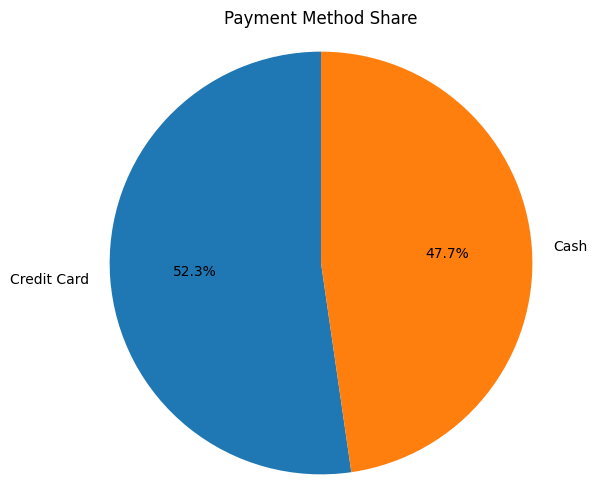

In [30]:
# Analyze payment methods
payment_counts = data['Payment Method'].value_counts()

# pie chart for payment method distribution
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Share')
#pie is drawn as a circle.
plt.axis('equal')
plt.show()

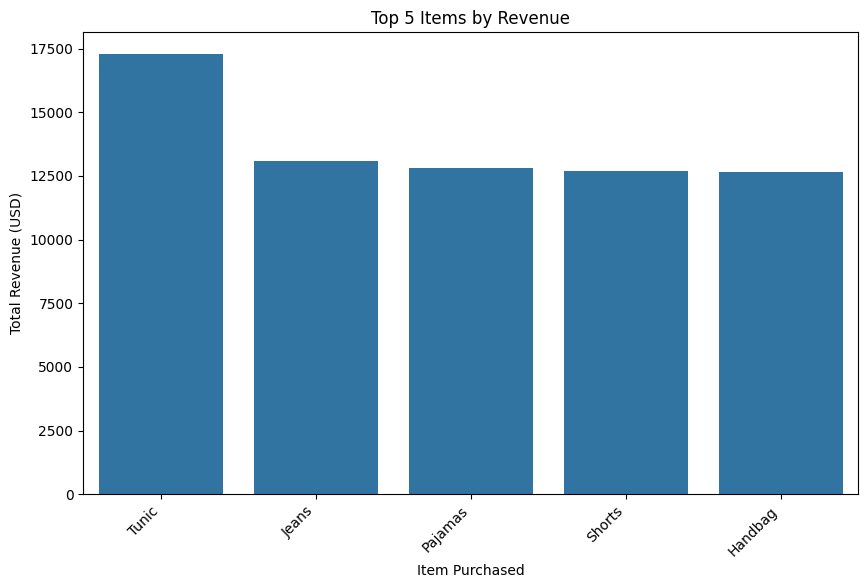

In [33]:
# bar chart for top 5 items by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_item.index, y=revenue_by_item.values)
plt.title('Top 5 Items by Revenue')
plt.xlabel('Item Purchased')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

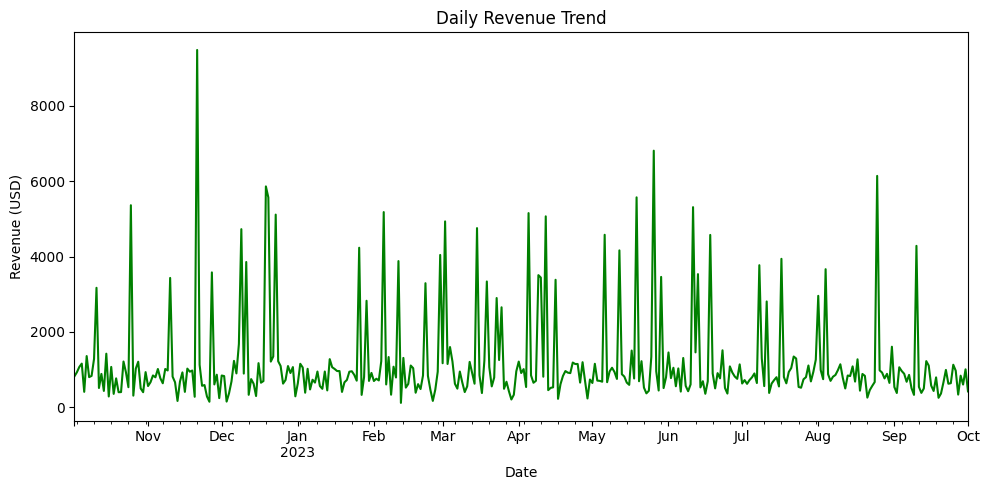

In [34]:
daily_revenue.plot(figsize=(10,5), color='green', title='Daily Revenue Trend')
plt.ylabel('Revenue (USD)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [35]:
#Saving the clean version
data.to_csv('Cleaned_Fashion_Sales.csv', index=False)
